In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

# Wczytanie obrazu
A = imread('13.webp')
X = np.mean(A, -1)  # Konwersja na skalę szarości (macierz n x m)

print(f"Wymiary macierzy obrazu: {X.shape}")
print(f"n (liczba wierszy) = {X.shape[0]}, m (liczba kolumn) = {X.shape[1]}")

Wymiary macierzy obrazu: (800, 800)
n (liczba wierszy) = 800, m (liczba kolumn) = 800


In [2]:
# SVD pełne (dla macierzy n x m)
U, S, VT = np.linalg.svd(X, full_matrices=True)
V = VT.T  # macierz V z SVD (m x m)

# Macierz Σ w postaci diagonalnej (n x m)
Sigma = np.zeros((X.shape[0], X.shape[1]))
Sigma[:len(S), :len(S)] = np.diag(S)

print(f"U: {U.shape}, Σ: {Sigma.shape}, V: {V.shape}")

U: (800, 800), Σ: (800, 800), V: (800, 800)


In [3]:
# Macierz korelacji kolumn: X^T X (m x m)
XTX = X.T @ X

# Macierz korelacji wierszy: X X^T (n x n)
XXT = X @ X.T

print(f"X^T X: {XTX.shape}, X X^T: {XXT.shape}")

X^T X: (800, 800), X X^T: (800, 800)


In [4]:
# Σ^2 (wartości singularne do kwadratu)
S_sq = S**2

# X^T X z SVD
Sigma_sq = np.diag(S_sq)
XTX_svd = V @ np.pad(Sigma_sq, ((0, V.shape[1] - len(S)), (0, V.shape[1] - len(S))), 'constant') @ V.T

# X X^T z SVD
XXT_svd = U @ np.pad(Sigma_sq, ((0, U.shape[1] - len(S)), (0, U.shape[1] - len(S))), 'constant') @ U.T

# Sprawdzenie zgodności (błąd średniokwadratowy)
error_XTX = np.mean((XTX - XTX_svd[:XTX.shape[0], :XTX.shape[1]])**2)
error_XXT = np.mean((XXT - XXT_svd[:XXT.shape[0], :XXT.shape[1]])**2)

print(f"Błąd MSE dla X^T X (SVD vs definicja): {error_XTX:.2e}")
print(f"Błąd MSE dla X X^T (SVD vs definicja): {error_XXT:.2e}")

Błąd MSE dla X^T X (SVD vs definicja): 3.46e-14
Błąd MSE dla X X^T (SVD vs definicja): 2.13e-15


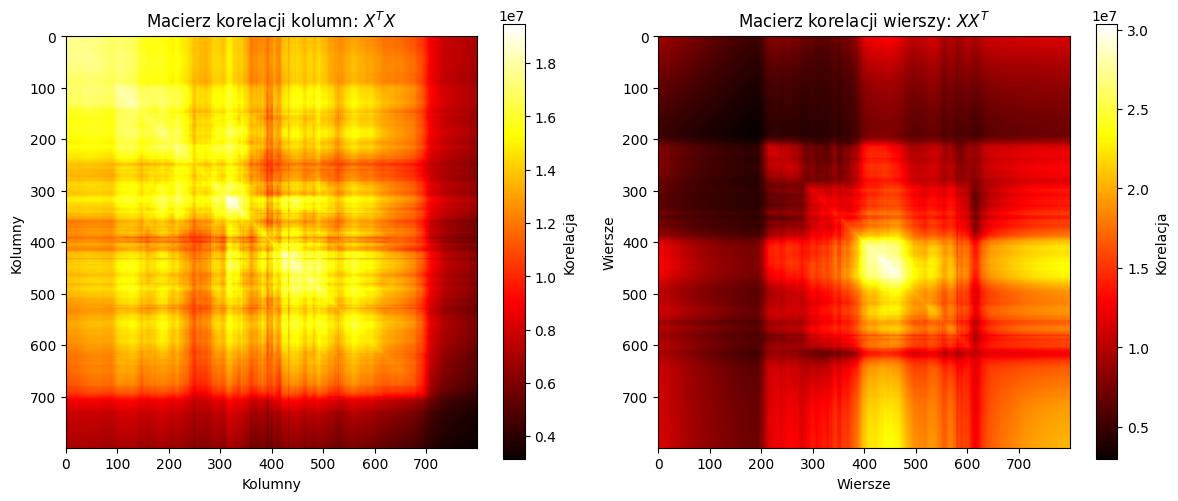

In [5]:
# Wykres 1: Macierz korelacji kolumn X^T X
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(XTX, cmap='hot', interpolation='nearest')
plt.colorbar(label='Korelacja')
plt.title('Macierz korelacji kolumn: $X^T X$')
plt.xlabel('Kolumny')
plt.ylabel('Kolumny')

# Wykres 2: Macierz korelacji wierszy X X^T
plt.subplot(1, 2, 2)
plt.imshow(XXT, cmap='hot', interpolation='nearest')
plt.colorbar(label='Korelacja')
plt.title('Macierz korelacji wierszy: $X X^T$')
plt.xlabel('Wiersze')
plt.ylabel('Wiersze')

plt.tight_layout()
plt.show()

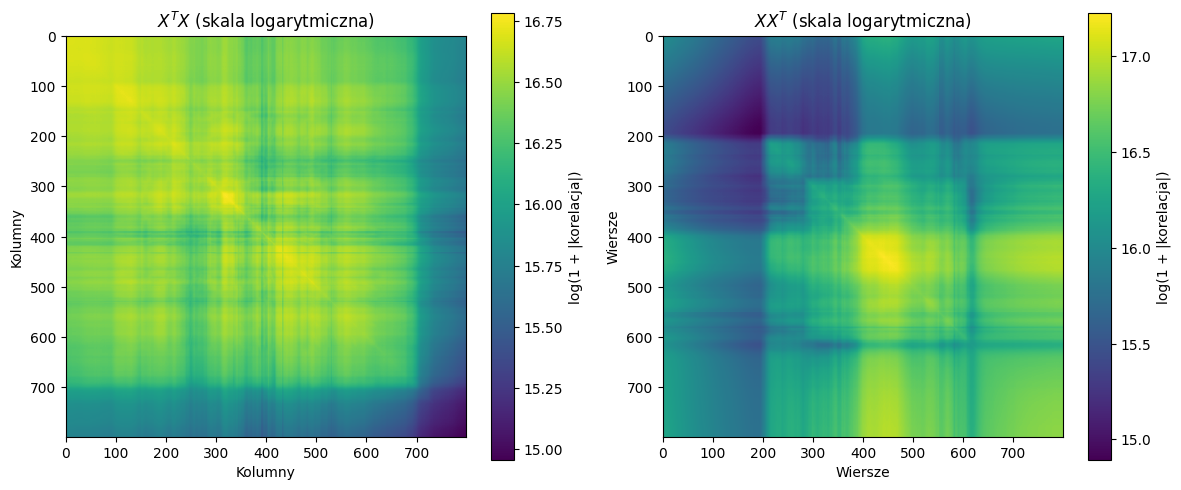

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.log1p(np.abs(XTX)), cmap='viridis', interpolation='nearest')
plt.colorbar(label='log(1 + |korelacja|)')
plt.title('$X^T X$ (skala logarytmiczna)')
plt.xlabel('Kolumny')
plt.ylabel('Kolumny')

plt.subplot(1, 2, 2)
plt.imshow(np.log1p(np.abs(XXT)), cmap='viridis', interpolation='nearest')
plt.colorbar(label='log(1 + |korelacja|)')
plt.title('$X X^T$ (skala logarytmiczna)')
plt.xlabel('Wiersze')
plt.ylabel('Wiersze')

plt.tight_layout()
plt.show()